In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# section A

1). List out the set of categorical and numerical variables in the dataset .

In [4]:
#Numerical variable
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


math score, reading score, writing score


In [5]:
#Categorical varible 
df.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


gender,race/ethnicity,parental level of education	,lunch,preparation

2). Find out the missing values( in %) for all variables in the data set?

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

3). Find the Percentage of students who have completed the test preparation course.

In [23]:
Per_course_com=(float(df['test preparation course'].value_counts()[1])/df.shape[0])*100
print('Percentage of students who have completed the test preparation course: ',Per_course_com)

('Percentage of students who have completed the test preparation course: ', 35.8)


4)Find the levels of parental education. What is the level of education held by majority of parents.

In [25]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Maximum number of parent went to some college and second most level of education is associate's degree

5)Add a new column to the dataset which is a total score of each student obtained by combining math, reading and writing score.

In [26]:
df['total_score']=df['math score']+df['reading score']+df['writing score']

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


# Section B

6.a)Create dummy columns for the categorical variable 'lunch'.

In [28]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [30]:
df1=pd.get_dummies(df,columns=['lunch'])

In [31]:
df1.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,total_score,lunch_free/reduced,lunch_standard
0,female,group B,bachelor's degree,none,72,72,74,218,0,1
1,female,group C,some college,completed,69,90,88,247,0,1
2,female,group B,master's degree,none,90,95,93,278,0,1
3,male,group A,associate's degree,none,47,57,44,148,1,0
4,male,group C,some college,none,76,78,75,229,0,1


6.b)Retain the column lunch_standard and remove the other one

In [34]:
df2=pd.get_dummies(df,columns=['lunch'],drop_first=True)
df2.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,total_score,lunch_standard
0,female,group B,bachelor's degree,none,72,72,74,218,1
1,female,group C,some college,completed,69,90,88,247,1
2,female,group B,master's degree,none,90,95,93,278,1
3,male,group A,associate's degree,none,47,57,44,148,0
4,male,group C,some college,none,76,78,75,229,1


6.c)Analyze and compare the percentage of female’s vs percentage of males who receive
standard lunch.

In [37]:
df2.groupby('gender').agg({'lunch_standard':'sum'})

,lunch_standard
gender,
female,329.0
male,316.0


In [57]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [42]:
a=df2.groupby('gender').agg({'lunch_standard':'sum'})

In [55]:
a['lunch_standard']


gender
female    329.0
male      316.0
Name: lunch_standard, dtype: float64

In [59]:
female_per_standard_lunch=(float(a['lunch_standard'][0])/df['gender'].value_counts()[0])*100
male_per_standard_lunch=(float(a['lunch_standard'][1])/df['gender'].value_counts()[1])*100
print('female_per_standard_lunch',female_per_standard_lunch)
print('male_per_standard_lunch',male_per_standard_lunch)

('female_per_standard_lunch', 63.51351351351351)
('male_per_standard_lunch', 65.56016597510373)


Male percantage is slight greater than female percentage who have standard lunch

7.a)Plot a suitable graph for comparing parental level of education vs. the total score of the
students? Write your inferences (3 marks)

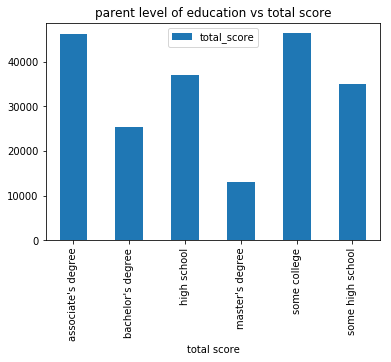

In [62]:
df2.groupby('parental level of education').agg({'total_score':'sum'}).plot(kind='bar')
plt.xlabel('total score')
plt.title('parent level of education vs total score')
plt.show()

We can see from the graph associate degree and some college level of education has highest total score.
Those who have master degree have lowest total score

7.b) Identify the category which has high scoring students? (2 Marks

In [63]:
df2.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,total_score,lunch_standard
0,female,group B,bachelor's degree,none,72,72,74,218,1
1,female,group C,some college,completed,69,90,88,247,1
2,female,group B,master's degree,none,90,95,93,278,1
3,male,group A,associate's degree,none,47,57,44,148,0
4,male,group C,some college,none,76,78,75,229,1


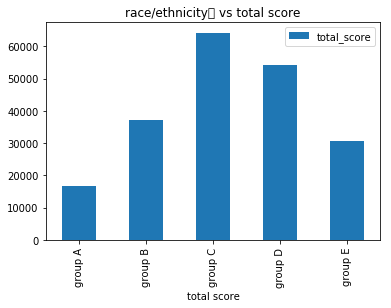

In [64]:
df2.groupby('race/ethnicity').agg({'total_score':'sum'}).plot(kind='bar')
plt.xlabel('total score')
plt.title('race/ethnicity	 vs total score')
plt.show()

Group c has highest number of score

# Section c

8.a). Consider the variable 'math score' and check for existence of outliers. If present, then find
the list of outliers. How do you treat these outliers

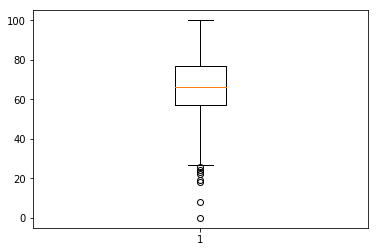

In [66]:
plt.boxplot(df['math score'])
plt.show()

In [67]:
df['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

In [70]:
q1=df['math score'].describe()['25%']
q3=df['math score'].describe()['75%']
iqr=q3-q1
low_lim=q1-1.5*iqr
up_lim=q3+1.5*iqr
low_lim,up_lim

(27.0, 107.0)

In [83]:
#list of outliers
df[(df['math score']<low_lim)|(df['math score']>up_lim) ]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
17,female,group B,some high school,free/reduced,none,18,32,28,78
59,female,group C,some high school,free/reduced,none,0,17,10,27
145,female,group C,some college,free/reduced,none,22,39,33,94
338,female,group B,some high school,free/reduced,none,24,38,27,89
466,female,group D,associate's degree,free/reduced,none,26,31,38,95
787,female,group B,some college,standard,none,19,38,32,89
842,female,group B,high school,free/reduced,completed,23,44,36,103
980,female,group B,high school,free/reduced,none,8,24,23,55


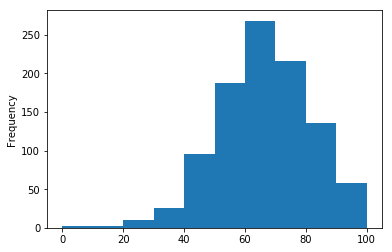

In [82]:
df['math score'].plot(kind='hist')
plt.show()

In [139]:
df['math score'].skew()

-0.27893514909431694

since data has left skewed ,so we can remove the outliers with the median value 

8)b). Find the correlation between reading score and writing score. Visualize the same using a
suitable map. And draw your inferences

In [84]:
df.corr()

,math score,reading score,writing score,total_score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total_score,0.918746,0.970331,0.965667,1.000000


We can see that reading score and writing score has 0.954598 correlation which is very good.

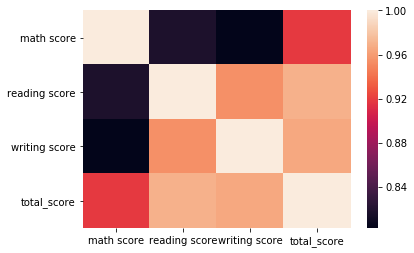

In [86]:
sns.heatmap(df.corr())
plt.show()

From the graphs we can also see that reading score and writing score is highly correlated

8.c)Which encoding techniques do you recommend to the categorical variables? And apply
those encoding techniques to these categorical variables (

In [87]:
df2.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,total_score,lunch_standard
0,female,group B,bachelor's degree,none,72,72,74,218,1
1,female,group C,some college,completed,69,90,88,247,1
2,female,group B,master's degree,none,90,95,93,278,1
3,male,group A,associate's degree,none,47,57,44,148,0
4,male,group C,some college,none,76,78,75,229,1


I will recommend convert categorical variable to numerical variable using dummies

In [90]:
df3=pd.get_dummies(df2,columns=['gender','race/ethnicity','parental level of education',
                           'test preparation course'],drop_first=True)
df3.head()

,math score,reading score,writing score,total_score,lunch_standard,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_none
0,72,72,74,218,1,0,1,0,0,0,1,0,0,0,0,1
1,69,90,88,247,1,0,0,1,0,0,0,0,0,1,0,0
2,90,95,93,278,1,0,1,0,0,0,0,0,1,0,0,1
3,47,57,44,148,0,1,0,0,0,0,0,0,0,0,0,1
4,76,78,75,229,1,1,0,1,0,0,0,0,0,1,0,1


8.d)Split the dataset into features(X: independent variables) and target variable (Y: total
score).

In [ ]:
#moving total score to last columns

df3.drop(columns='total_score',inplace =True)


In [97]:
df3['total_score']=df3['math score']+df3['reading score']+df3['writing score']
df3.head()

,math score,reading score,writing score,lunch_standard,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_none,total_score
0,72,72,74,1,0,1,0,0,0,1,0,0,0,0,1,218
1,69,90,88,1,0,0,1,0,0,0,0,0,1,0,0,247
2,90,95,93,1,0,1,0,0,0,0,0,1,0,0,1,278
3,47,57,44,0,1,0,0,0,0,0,0,0,0,0,1,148
4,76,78,75,1,1,0,1,0,0,0,0,0,1,0,1,229


In [126]:
df3.shape

(1000, 16)

In [133]:
x=df3.iloc[0:1000,0:15] # all coulmns except last column
x.head()

,math score,reading score,writing score,lunch_standard,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_none
0,72,72,74,1,0,1,0,0,0,1,0,0,0,0,1
1,69,90,88,1,0,0,1,0,0,0,0,0,1,0,0
2,90,95,93,1,0,1,0,0,0,0,0,1,0,0,1
3,47,57,44,0,1,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,1,0,1,0,0,0,0,0,1,0,1


In [135]:
y=df3.iloc[0:1000,15] #last column i.e total score
y.head()

0    218
1    247
2    278
3    148
4    229
Name: total_score, dtype: int64

In [100]:
y.head()

,math score,reading score,writing score,lunch_standard,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_none,total_score
0,72,72,74,1,0,1,0,0,0,1,0,0,0,0,1,218
1,69,90,88,1,0,0,1,0,0,0,0,0,1,0,0,247
2,90,95,93,1,0,1,0,0,0,0,0,1,0,0,1,278
3,47,57,44,0,1,0,0,0,0,0,0,0,0,0,1,148
4,76,78,75,1,1,0,1,0,0,0,0,0,1,0,1,229


In [137]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [138]:
X_train.shape

(700, 15)